In [ ]:
https://www.pilgrimsolutions.com/dataset/VariablesVINOS.pdf
https://www.pilgrimsolutions.com/dataset/DatosVino2.csv

analisis y comprension
recategorizacion
vaqlores nulos, duplicados, outliers
transformacion
regresion logistic con target - compra
metricas



In [197]:
import pandas as pd
import csv

path = r'https://www.pilgrimsolutions.com/dataset/DatosVino2.csv'
df = pd.read_csv(path, sep=';')
df

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9","0,12","6,6",B,5,?,1.00,"4,56"
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4","0,49",112,b,4,?,NaN,"3,01"
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1","0,39","10,2",B,2,?,1.00,1
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5","-0,81","4,4",R,4,?,3.00,"1,85"
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2","0,44","10,1",M,2,?,1.00,"1,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5","0,45","12,7",M,2,*,3.00,"1,55"
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9","0,47","10,3",B,2,?,1.00,"3,79"
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8","3,72","7,6",M,3,?,2.00,"2,15"
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6","0,44","13,8",B,2,*,1.00,"2,44"


In [198]:
#compruebo las variables categóricas y observo que por el momento la única variable numérica es 'Region'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Beneficio       6365 non-null   int64  
 2   Compra          6365 non-null   int64  
 3   Acidez          6365 non-null   object 
 4   AcidoCitrico    6365 non-null   object 
 5   pH              6365 non-null   object 
 6   CloruroSodico   6365 non-null   object 
 7   Densidad        6365 non-null   object 
 8   Azucar          6365 non-null   object 
 9   Sulfatos        5761 non-null   object 
 10  Alcohol         6365 non-null   object 
 11  Etiqueta        6365 non-null   object 
 12  CalifProductor  6365 non-null   int64  
 13  Clasificacion   6365 non-null   object 
 14  Region          6258 non-null   float64
 15  PrecioBotella   6365 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 795.8+ KB


In [215]:
#compruebo que no constan datos duplicados
df.duplicated().sum()

0

In [216]:
#compruebo los nulos
df.isnull().sum()

ID                  0
Beneficio           0
Compra              0
Acidez              0
AcidoCitrico        0
pH                  0
CloruroSodico       0
Densidad            0
Azucar              0
Sulfatos          604
Alcohol             0
Etiqueta            0
CalifProductor      0
Clasificacion       0
Region            107
PrecioBotella       0
dtype: int64

In [217]:
#elimino nulos de region
df2 =df.copy()
df2['Region_int'] = df2['Region']
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella,Region_int
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9","0,12","6,6",B,5,?,1.00,"4,56",1.00
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4","0,49",112,b,4,?,NaN,"3,01",NaN
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1","0,39","10,2",B,2,?,1.00,1,1.00
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5","-0,81","4,4",R,4,?,3.00,"1,85",3.00
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2","0,44","10,1",M,2,?,1.00,"1,28",1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5","0,45","12,7",M,2,*,3.00,"1,55",3.00
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9","0,47","10,3",B,2,?,1.00,"3,79",1.00
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8","3,72","7,6",M,3,?,2.00,"2,15",2.00
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6","0,44","13,8",B,2,*,1.00,"2,44",1.00


In [218]:
df2['Region_int'].fillna(0, inplace=True)
df2

,ID,Beneficio,Compra,Acidez,AcidoCitrico,pH,CloruroSodico,Densidad,Azucar,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella,Region_int
0,13606,0,0,"0,39","0,14","4,99","0,073","1,02195","5,9","0,12","6,6",B,5,?,1.00,"4,56",1.00
1,3119,0,0,"2,19","2,58","5,54","0,205","0,95373","6,4","0,49",112,b,4,?,NaN,"3,01",0.00
2,1190,0,0,"1,44","-1,54","5,1","0,058","0,99271","7,1","0,39","10,2",B,2,?,1.00,1,1.00
3,5261,0,0,"0,5","0,3","5,23","0,276","0,9959","3,5","-0,81","4,4",R,4,?,3.00,"1,85",3.00
4,2871,0,0,"-0,1","0,3","5,75","0,048","1,02724","7,2","0,44","10,1",M,2,?,1.00,"1,28",1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,15918,0,0,"0,41","0,17","8,55","-0,079","0,96961","9,5","0,45","12,7",M,2,*,3.00,"1,55",3.00
6361,4285,0,0,"-0,77","0,29","8,96","0,042","0,99304","8,9","0,47","10,3",B,2,?,1.00,"3,79",1.00
6362,13580,0,0,"0,41","0,07","8,88","0,587","0,9962","4,8","3,72","7,6",M,3,?,2.00,"2,15",2.00
6363,10080,0,0,"-0,2","0,38","8,19","0,052","1,00796","13,6","0,44","13,8",B,2,*,1.00,"2,44",1.00


In [219]:
#elimino datos que considero irrelevantes
df2 = df2.drop(['Etiqueta','CloruroSodico','ID',], axis=1)
df2

,Beneficio,Compra,Acidez,AcidoCitrico,pH,Densidad,Azucar,Sulfatos,Alcohol,CalifProductor,Clasificacion,Region,PrecioBotella,Region_int
0,0,0,"0,39","0,14","4,99","1,02195","5,9","0,12","6,6",5,?,1.00,"4,56",1.00
1,0,0,"2,19","2,58","5,54","0,95373","6,4","0,49",112,4,?,NaN,"3,01",0.00
2,0,0,"1,44","-1,54","5,1","0,99271","7,1","0,39","10,2",2,?,1.00,1,1.00
3,0,0,"0,5","0,3","5,23","0,9959","3,5","-0,81","4,4",4,?,3.00,"1,85",3.00
4,0,0,"-0,1","0,3","5,75","1,02724","7,2","0,44","10,1",2,?,1.00,"1,28",1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,0,0,"0,41","0,17","8,55","0,96961","9,5","0,45","12,7",2,*,3.00,"1,55",3.00
6361,0,0,"-0,77","0,29","8,96","0,99304","8,9","0,47","10,3",2,?,1.00,"3,79",1.00
6362,0,0,"0,41","0,07","8,88","0,9962","4,8","3,72","7,6",3,?,2.00,"2,15",2.00
6363,0,0,"-0,2","0,38","8,19","1,00796","13,6","0,44","13,8",2,*,1.00,"2,44",1.00


In [188]:
#compruebo los valores unicos de la clasificacion ya que parecen ser simbolos y si decido utilizarlos es mejor sustituir por su equivalente en números
valores_unicos = df2['Clasificacion'].unique()
valores_unicos

array(['?', '*', '**', '***', '****'], dtype=object)

In [220]:
mapping = {'?': 0, '*': 1, '**': 2, '***': 3, '****': 4}
df2['Clasificacion_int'] = df2['Clasificacion']
df2['Clasificacion_int'] = df2['Clasificacion_int'].replace(mapping)
df2

,Beneficio,Compra,Acidez,AcidoCitrico,pH,Densidad,Azucar,Sulfatos,Alcohol,CalifProductor,Clasificacion,Region,PrecioBotella,Region_int,Clasificacion_int
0,0,0,"0,39","0,14","4,99","1,02195","5,9","0,12","6,6",5,?,1.00,"4,56",1.00,0
1,0,0,"2,19","2,58","5,54","0,95373","6,4","0,49",112,4,?,NaN,"3,01",0.00,0
2,0,0,"1,44","-1,54","5,1","0,99271","7,1","0,39","10,2",2,?,1.00,1,1.00,0
3,0,0,"0,5","0,3","5,23","0,9959","3,5","-0,81","4,4",4,?,3.00,"1,85",3.00,0
4,0,0,"-0,1","0,3","5,75","1,02724","7,2","0,44","10,1",2,?,1.00,"1,28",1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,0,0,"0,41","0,17","8,55","0,96961","9,5","0,45","12,7",2,*,3.00,"1,55",3.00,1
6361,0,0,"-0,77","0,29","8,96","0,99304","8,9","0,47","10,3",2,?,1.00,"3,79",1.00,0
6362,0,0,"0,41","0,07","8,88","0,9962","4,8","3,72","7,6",3,?,2.00,"2,15",2.00,0
6363,0,0,"-0,2","0,38","8,19","1,00796","13,6","0,44","13,8",2,*,1.00,"2,44",1.00,1


In [221]:
import pandas as pd
# Lista de columnas a transformar
columnas_transformar = ['Alcohol', 'Azucar', 'Acidez','Densidad','pH','AcidoCitrico']

# Aplicar la transformación a las columnas seleccionadas
df2[columnas_transformar] = df2[columnas_transformar].applymap(lambda x: float(x.replace(',', '.')) * 100)
df2


,Beneficio,Compra,Acidez,AcidoCitrico,pH,Densidad,Azucar,Sulfatos,Alcohol,CalifProductor,Clasificacion,Region,PrecioBotella,Region_int,Clasificacion_int
0,0,0,39.00,14.00,499.00,102.19,590.00,"0,12",660.00,5,?,1.00,"4,56",1.00,0
1,0,0,219.00,258.00,554.00,95.37,640.00,"0,49",11200.00,4,?,NaN,"3,01",0.00,0
2,0,0,144.00,-154.00,510.00,99.27,710.00,"0,39",1020.00,2,?,1.00,1,1.00,0
3,0,0,50.00,30.00,523.00,99.59,350.00,"-0,81",440.00,4,?,3.00,"1,85",3.00,0
4,0,0,-10.00,30.00,575.00,102.72,720.00,"0,44",1010.00,2,?,1.00,"1,28",1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,0,0,41.00,17.00,855.00,96.96,950.00,"0,45",1270.00,2,*,3.00,"1,55",3.00,1
6361,0,0,-77.00,29.00,896.00,99.30,890.00,"0,47",1030.00,2,?,1.00,"3,79",1.00,0
6362,0,0,41.00,7.00,888.00,99.62,480.00,"3,72",760.00,3,?,2.00,"2,15",2.00,0
6363,0,0,-20.00,38.00,819.00,100.80,1360.00,"0,44",1380.00,2,*,1.00,"2,44",1.00,1


In [ ]:
#df2['Alcohol','Azucar','Acidez','Densidad'] = df2['Alcohol','Azucar','Acidez','Densidad'].str.replace(',', '.')
#df2['Alcohol','Azucar','Acidez','Densidad'] = df2['Alcohol','Azucar','Acidez','Densidad'].astype(float)

#df2['Azucar'] = df2['Azucar'].str.replace(',', '.')
#df2['Azucar'] = df2['Azucar'].astype(float)

#df2['Acidez'] = df2['Acidez'].str.replace(',', '.')
#df2['Acidez'] = df2['Acidez'].astype(float)

#df2['Densidad'] = df2['Densidad'].str.replace(',', '.')
#df2['Densidad'] = df2['Densidad'].astype(float)


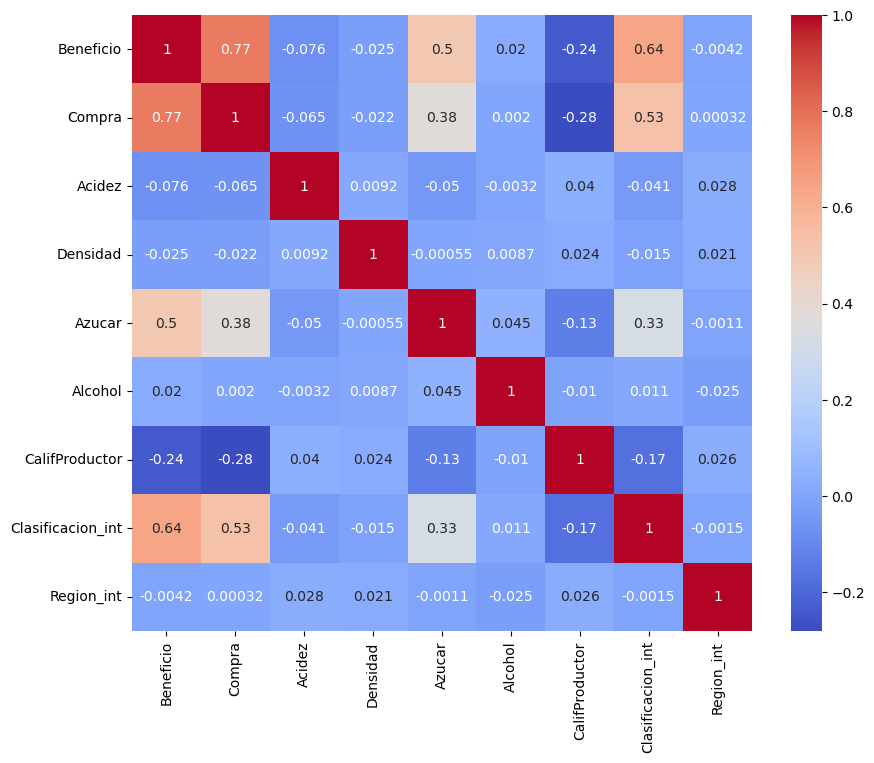

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes
columns = ['Beneficio', 'Compra', 'Acidez', 'Densidad', 'Azucar', 'Alcohol', 'CalifProductor', 'Clasificacion_int', 'Region_int', 'PrecioBotella']

# Crear una subselección del dataframe con las columnas relevantes
sub_df2 = df2[columns]

# Calcular la matriz de correlación
corr_matrix = sub_df2.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()


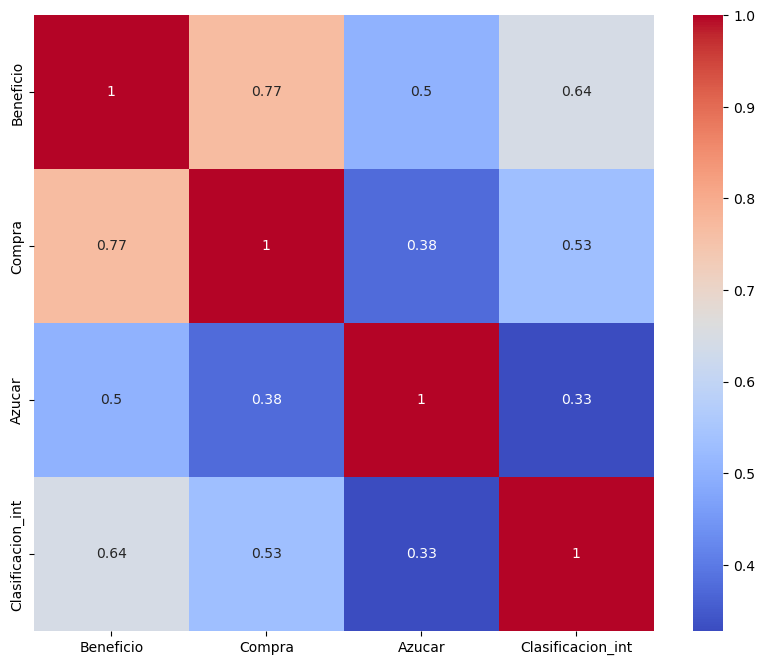

In [208]:

# Seleccionar las columnas que considero relevantes
columns = ['Beneficio', 'Compra', 'Azucar', 'Clasificacion_int']

# Crear una subselección del dataframe con las columnas relevantes
sub_df2 = df2[columns]

# Calcular la matriz de correlación
corr_matrix = sub_df2.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()


In [222]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df2[['Azucar', 'Clasificacion_int']]
y = df2['Compra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8554595443833464
Precision: 0.8999008919722498
Recall: 0.9162462159434914
F1-score: 0.908


In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  datos de prueba en X_test y las etiquetas reales en y_test
# modelo entrenado 

# Realizar predicciones en el conjunto de prueba
model = LogisticRegression()
model.fit(X_train, y_train)
predicciones = model.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, predicciones)
print('Precisión:', precision)

# Calcular la recuperación (recall)
recuperacion = recall_score(y_test, predicciones)
print('Recuperación:', recuperacion)

# Calcular el puntaje F1
f1 = f1_score(y_test, predicciones)
print('Puntaje F1:', f1)


Precisión: 0.7847604084838963
Recuperación: 0.9545913218970736
Puntaje F1: 0.873499538319483


In [155]:
X = df2[['Beneficio', 'Clasificacion_int']]
y = df2['Compra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [156]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicciones = model.predict(X_test)

# Calcular la precisión precisión = verdaderos positivos / (verdaderos positivos + falsos positivos)

precision = accuracy_score(y_test, predicciones)
print('Precisión:', precision)

# Calcular la recuperación (recall) recuperación = verdaderos positivos / (verdaderos positivos + falsos negativos)

recuperacion = recall_score(y_test, predicciones)
print('Recuperación:', recuperacion)

# Calcular el puntaje F1 puntaje F1 = 2 * (precisión * recuperación) / (precisión + recuperación)

f1 = f1_score(y_test, predicciones)
print('Puntaje F1:', f1)

Precisión: 1.0
Recuperación: 1.0
Puntaje F1: 1.0


In [162]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Definir los datos de entrada (X) y la variable objetivo (y)
X = df2[['Beneficio', 'Clasificacion_int']]
y = df2['Compra']

# Definir el modelo de regresión logística
model = LogisticRegression()

# Definir el número de divisiones (k) para la validación cruzada
k = 5

# Definir el esquema de validación cruzada
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener los puntajes de precisión
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

# Imprimir los puntajes de precisión obtenidos en cada iteración
print("Puntajes de precisión:", scores)

# Calcular la precisión promedio y desviación estándar de los puntajes
mean_accuracy = scores.mean()
std_accuracy = scores.std()

# Imprimir la precisión promedio y desviación estándar
print("Precisión promedio:", mean_accuracy)
print("Desviación estándar:", std_accuracy)


Puntajes de precisión: [1. 1. 1. 1. 1.]
Precisión promedio: 1.0
Desviación estándar: 0.0
